<a href="https://colab.research.google.com/github/chetan7116desai/COVID-19/blob/master/covid_19_global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the required libraries
import numpy as np 
import pandas as pd 
#visualisation libraries
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
#it will provide the outputs of all maps in same window
%matplotlib inline 

In [ ]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
confirmed_cases

Province/State                    Country/Region  \
0                                 NaN                       Afghanistan   
1                                 NaN                           Albania   
2                                 NaN                           Algeria   
3                                 NaN                           Andorra   
4                                 NaN                            Angola   
5                                 NaN               Antigua and Barbuda   
6                                 NaN                         Argentina   
7                                 NaN                           Armenia   
8        Australian Capital Territory                         Australia   
9                     New South Wales                         Australia   
10                 Northern Territory                         Australia   
11                         Queensland                         Australia   
12                    South Australia                         Australia   
13                           Tasmania                         Australia   
14                           Victoria                         Australia   
15                  Western Australia                         Australia   
16                                NaN                           Austria   
17                                NaN                        Azerbaijan   
18                                NaN                           Bahamas   
19                                NaN                           Bahrain   
20                                NaN                        Bangladesh   
21                                NaN                          Barbados   
22                                NaN                           Belarus   
23                                NaN                           Belgium   
24                                NaN                             Benin   
25                                NaN                            Bhutan   
26                                NaN                           Bolivia   
27                                NaN            Bosnia and Herzegovina   
28                                NaN                            Brazil   
29                                NaN                            Brunei   
30                                NaN                          Bulgaria   
31                                NaN                      Burkina Faso   
32                                NaN                        Cabo Verde   
33                                NaN                          Cambodia   
34                                NaN                          Cameroon   
35                            Alberta                            Canada   
36                   British Columbia                            Canada   
37                     Grand Princess                            Canada   
38                           Manitoba                            Canada   
39                      New Brunswick                            Canada   
40          Newfoundland and Labrador                            Canada   
41                        Nova Scotia                            Canada   
42                            Ontario                            Canada   
43               Prince Edward Island                            Canada   
44                             Quebec                            Canada   
45                       Saskatchewan                            Canada   
46                                NaN          Central African Republic   
47                                NaN                              Chad   
48                                NaN                             Chile   
49                              Anhui                             China   
50                            Beijing                             China   
51                          Chongqing                             China   
52                             Fujian           

In [ ]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [ ]:
deaths_reported.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
0        0        0        0       0       0       0       0       0       0   
1        0        0        0       0       0       0       0       0       0   
2        0        0        0       0       0       0       0       0       0   
3        0        0        0       0       0       0       0       0       0   
4        0        0        0       0       0       0       0       0       0   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
0       0       0       0        0        0        0        0        0   
1       0       0       0        0        1        1        1        1   
2       0       0       0        0        0        1        2        3   
3       0       0       0        0        0        0        0        0   
4       0       0       0        0        0        0        0        0   

   3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0        0        0        0        0        0        0        0        1   
1        1        1        1        2        2        2        2        2   
2        4        4        4        7        9       11       15       17   
3        0        0        0        0        0        0        0        1   
4        0        0        0        0        0        0        0        0   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  \
0        1        1        2        4        4        4        4        4   
1        4        5        5        6        8       10       10       11   
2       17       19       21       25       26   

In [ ]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
recovered_cases.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
0        0        0        0       0       0       0       0       0       0   
1        0        0        0       0       0       0       0       0       0   
2        0        0        0       0       0       0       0       0       0   
3        0        0        0       0       0       0       0       0       0   
4        0        0        0       0       0       0       0       0       0   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
0       0       0       0        0        0        0        0        0   
1       0       0       0        0        0        0        0        0   
2       0       0       0        0        0        8        8       12   
3       0       0       0        0        0        1        0        1   
4       0       0       0        0        0        0        0        0   

   3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0        0        1        1        1        1        1        1        1   
1        0        0        0        0        0        0        2        2   
2       12       12       12       12       32       32       32       65   
3        1        1        1        1        1        1        1        1   
4        0        0        0        0        0        0        0        0   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  \
0        1        1        2        2        2        2        2        2   
1        2       10       17       17       31       31       33       44   
2       65       24       65       29       29   

In [ ]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-20-2020.csv')

In [ ]:
latest_data

FIPS                                     Admin2  \
0     45001.0                                  Abbeville   
1     22001.0                                     Acadia   
2     51001.0                                   Accomack   
3     16001.0                                        Ada   
4     19001.0                                      Adair   
5     21001.0                                      Adair   
6     29001.0                                      Adair   
7     40001.0                                      Adair   
8      8001.0                                      Adams   
9     16003.0                                      Adams   
10    17001.0                                      Adams   
11    18001.0                                      Adams   
12    19003.0                                      Adams   
13    28001.0                                      Adams   
14    31001.0                                      Adams   
15    39001.0                                      Adams   
16    42001.0                                      Adams   
17    53001.0                                      Adams   
18    55001.0                                      Adams   
19    50001.0                                    Addison   
20    45003.0                                      Aiken   
21    27001.0                                     Aitkin   
22    12001.0                                    Alachua   
23    37001.0                                   Alamance   
24     6001.0                                    Alameda   
25     8003.0                                    Alamosa   
26    36001.0                                     Albany   
27    56001.0                                     Albany   
28    51003.0                                  Albemarle   
29    26001.0                                     Alcona   
30    28003.0                                     Alcorn   
31    17003.0                                  Alexander   
32    37003.0                                  Alexander   
33    51510.0                                 Alexandria   
34    40003.0                                    Alfalfa   
35    19005.0                                  Allamakee   
36    26005.0                                    Allegan   
37    24001.0                                   Allegany   
38    36003.0                                   Allegany   
39    37005.0                                  Alleghany   
40    51005.0                                  Alleghany   
41    42003.0                                  Allegheny   
42    18003.0                                      Allen   
43    21003.0                                      Allen   
44    22003.0                                      Allen   
45    39003.0                                      Allen   
46    45005.0                                  Allendale   
47    26007.0                                     Alpena   
48     6003.0                                     Alpine   
49     6005.0                                     Amador   
50    51007.0                                     Amelia   
51    51009.0                                    Amherst   
52    28005.0                                      Amite   
53     2020.0                                  Anchorage   
54    20003.0                                   Anderson   
55    21005.0                                   Anderson   
56    45007.0                                   Anderson   
57    47001.0                                   Anderson   
58    48001.0                                   Anderson   
59    29003.0                                     Andrew   
60    48003.0                                    Andrews   
61    23001.0                               Androscoggin   
62    48005.0                                   Angelina   
63    24003.0                               Anne Arundel   
64    27003.0                                      Anoka   
65    37007.0                                    

In [ ]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/16/20', '5/17/20', '5/18/20', '5/19/20', '5/20/20', '5/21/20',
       '5/22/20', '5/23/20', '5/24/20', '5/25/20'],
      dtype='object', length=129)

In [ ]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [ ]:
confirmed

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
5          0        0        0        0        0        0        0        0   
6          0        0        0        0        0        0        0        0   
7          0        0        0        0        0        0        0        0   
8          0        0        0        0        0        0        0        0   
9          0        0        0        0        3        4        4        4   
10         0        0        0        0        0        0        0        0   
11         0        0        0        0        0        0        0        1   
12         0        0        0        0        0        0        0        0   
13         0        0        0        0        0        0        0        0   
14         0        0        0        0        1        1        1        1   
15         0        0        0        0        0        0        0        0   
16         0        0        0        0        0        0        0        0   
17         0        0        0        0        0        0        0        0   
18         0        0        0        0        0        0        0        0   
19         0        0        0        0        0        0        0        0   
20         0        0        0        0        0        0        0        0   
21         0        0        0        0        0        0        0        0   
22         0        0        0        0        0        0        0        0   
23         0        0        0        0        0        0        0        0   
24         0        0        0        0        0        0        0        0   
25         0        0        0        0        0        0        0        0   
26         0        0        0        0        0        0        0        0   
27         0        0        0        0        0        0        0        0   
28         0        0        0        0        0        0        0        0   
29         0        0        0        0        0        0        0        0   
30         0        0        0        0        0        0        0        0   
31         0        0        0        0        0        0        0        0   
32         0        0        0        0        0        0        0        0   
33         0        0        0        0        0        1        1        1   
34         0        0        0        0        0        0        0        0   
35         0        0        0        0        0        0        0        0   
36         0        0        0        0        0        0        1        1   
37         0        0        0        0        0        0        0        0   
38         0        0        0        0        0        0        0        0   
39         0        0        0        0        0        0        0        0   
40         0        0        0        0        0        0        0        0   
41         0        0        0        0        0        0        0        0   
42         0        0        0        0        1        1        1        1   
43         0        0        0        0        0        0        0        0   
44         0        0        0        0        0        0        0        0   
45         0        0        0        0        0        0        0        0   
46         0        0        0        0        0        0        0        0   
47         0        0        0        0        0        0        0        0   
48         0        0        0        0        0        0        0        0   
49         1        9       15       39       60       

In [ ]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []


china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []

In [ ]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    
    
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())


In [ ]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97888,
 101806,
 105848,
 109822,
 113595,
 118623,
 125879,
 131007,
 145225,
 156120,
 167507,
 181653,
 197150,
 214873,
 242632,
 272264,
 304580,
 337022,
 378301,
 418295,
 467817,
 529722,
 593764,
 661174,
 720291,
 782816,
 857608,
 933010,
 1013863,
 1096324,
 1176436,
 1249743,
 1321436,
 1396438,
 1480232,
 1566102,
 1658261,
 1736412,
 1835145,
 1905165,
 1975566,
 2055748,
 2152181,
 2239990,
 2317636,
 2400787,
 2472109,
 2549046,
 2624608,
 2708403,
 2795731,
 2881140,
 2955033,
 3023722,
 3097229,
 3172287,
 3256910,
 3345558,
 3427584,
 3506729,
 3583055,
 3662691,
 3756069,
 3845718,
 3938064,
 4024009,
 4101699,
 4177502,
 4261747,
 4347018

deaths on each day

In [ ]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2007,
 2122,
 2247,
 2251,
 2458,
 2469,
 2629,
 2708,
 2770,
 2814,
 2872,
 2941,
 2996,
 3085,
 3160,
 3254,
 3347,
 3459,
 3558,
 3801,
 3987,
 4263,
 4614,
 4912,
 5409,
 5832,
 6473,
 7151,
 7957,
 8824,
 9947,
 11423,
 13125,
 14826,
 16759,
 19017,
 21789,
 24788,
 28292,
 31811,
 35323,
 39443,
 44238,
 49685,
 55834,
 61826,
 67996,
 73077,
 78767,
 86662,
 93354,
 100915,
 108137,
 114170,
 119853,
 125561,
 132439,
 140685,
 147963,
 156821,
 163236,
 167772,
 173124,
 180236,
 186912,
 193665,
 199997,
 206187,
 209900,
 214444,
 220801,
 227665,
 233360,
 238619,
 243813,
 247470,
 251537,
 257239,
 263855,
 269567,
 274898,
 279311,
 282709,
 286330,
 291942,
 297197,
 302418,
 307666,
 311781,
 315185,
 318481,
 323285,
 328115,
 332924,
 338160,
 342097,
 345059,
 346232]

In [ ]:
confirmed_sum

5495061

In [ ]:
death_sum

346232

In [ ]:
recovered_sum

2231738

In [ ]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 7,
 8,
 8,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 15,
 15,
 15,
 51,
 51,
 57,
 58,
 60,
 68,
 74,
 98,
 118,
 149,
 219,
 267,
 403,
 519,
 588,
 962,
 1285,
 1667,
 2181,
 2729,
 3536,
 4661,
 6437,
 7781,
 13748,
 19274,
 25600,
 33280,
 43862,
 53925,
 65844,
 83836,
 101962,
 121786,
 140910,
 162147,
 188172,
 213602,
 244008,
 275798,
 309027,
 336802,
 366317,
 397121,
 428654,
 463327,
 496846,
 526776,
 555313,
 580624,
 607670,
 636674,
 667981,
 700062,
 732590,
 758809,
 784708,
 811865,
 840351,
 869170,
 905358,
 938154,
 965785,
 988197,
 1012582,
 1039909,
 1069424,
 1103461,
 1132539,
 1158040,
 1180375,
 1204351,
 1229331,
 1257023,
 1283929,
 1309550,
 1329260,
 1347881,
 1369376,
 1390406,
 1417774,
 1442824,
 1467820,
 1486757,
 1508308,
 1528568,
 1551853,
 1577147,
 1600937,
 1622612,
 1643246,
 1662302]

In [ ]:
india_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950]

In [ ]:
italy_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 3,
 45,
 46,
 46,
 83,
 149,
 160,
 276,
 414,
 523,
 589,
 622,
 724,
 724,
 1045,
 1045,
 1439,
 1966,
 2335,
 2749,
 2941,
 4025,
 4440,
 4440,
 6072,
 7024,
 7024,
 8326,
 9362,
 10361,
 10950,
 12384,
 13030,
 14620,
 15729,
 16847,
 18278,
 19758,
 20996,
 21815,
 22837,
 24392,
 26491,
 28470,
 30455,
 32534,
 34211,
 35435,
 37130,
 38092,
 40164,
 42727,
 44927,
 47055,
 48877,
 51600,
 54543,
 57576,
 60498,
 63120,
 64928,
 66624,
 68941,
 71252,
 75945,
 78249,
 79914,
 81654,
 82879,
 85231,
 93245,
 96276,
 99023,
 103031,
 105186,
 106587,
 109039,
 112541,
 115288,
 120205,
 122810,
 125176,
 127326,
 129401,
 132282,
 134560,
 136720,
 138840,
 140479,
 141981]

In [ ]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [ ]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

In [ ]:
spain_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 7,
 2,
 17,
 13,
 39,
 36,
 45,
 57,
 37,
 141,
 100,
 173,
 400,
 622,
 582,
 0,
 2955,
 1159,
 1407,
 2144,
 1806,
 2162,
 4053,
 2447,
 4964,
 3394,
 6368,
 4749,
 9630,
 8271,
 7933,
 7516,
 6875,
 7846,
 7967,
 8195,
 7947,
 7134,
 6969,
 5478,
 5029,
 5267,
 6278,
 5002,
 5051,
 4754,
 3804,
 3268,
 2442,
 5103,
 7304,
 5891,
 887,
 6948,
 1536,
 3968,
 4211,
 4635,
 -10034,
 2915,
 1729,
 1831,
 1308,
 2144,
 518,
 1781,
 1366,
 884,
 545,
 1318,
 996,
 1122,
 1410,
 721,
 772,
 3086,
 594,
 661,
 849,
 643,
 515,
 0,
 908,
 431,
 518,
 482,
 1787,
 466,
 482,
 -372]

In [ ]:
germany_daily_increase

[0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 1,
 3,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 10,
 19,
 2,
 31,
 51,
 29,
 37,
 66,
 220,
 188,
 129,
 241,
 136,
 281,
 451,
 170,
 1597,
 910,
 1210,
 1477,
 1985,
 3070,
 2993,
 4528,
 2365,
 2660,
 4183,
 3930,
 4337,
 6615,
 6933,
 6824,
 4400,
 4790,
 4923,
 6064,
 6922,
 6365,
 4933,
 4031,
 3251,
 4289,
 5633,
 4885,
 3990,
 2737,
 2946,
 2218,
 1287,
 3394,
 2945,
 3699,
 1945,
 1842,
 1881,
 1226,
 2357,
 2481,
 1870,
 1514,
 1257,
 988,
 1154,
 1627,
 1470,
 1068,
 890,
 697,
 488,
 855,
 1155,
 1268,
 1158,
 736,
 555,
 697,
 595,
 927,
 380,
 755,
 519,
 617,
 182,
 1227,
 695,
 548,
 689,
 276,
 342,
 272]

In [ ]:
# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

In [ ]:
us_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 5,
 1,
 4,
 1,
 2,
 3,
 4,
 1,
 6,
 8,
 6,
 8,
 10,
 14,
 26,
 34,
 31,
 94,
 91,
 92,
 145,
 199,
 225,
 309,
 406,
 543,
 475,
 676,
 776,
 1171,
 1144,
 1427,
 1322,
 1610,
 1505,
 1519,
 2297,
 2079,
 2018,
 2069,
 2009,
 1720,
 1784,
 2392,
 2498,
 2084,
 2584,
 2347,
 1170,
 1741,
 2400,
 2326,
 2312,
 1769,
 2262,
 1126,
 1338,
 2136,
 2612,
 2029,
 1947,
 1426,
 1313,
 1240,
 2142,
 2391,
 2207,
 1518,
 1615,
 731,
 1156,
 1674,
 1763,
 1779,
 1632,
 1224,
 808,
 785,
 1574,
 1518,
 1263,
 1277,
 1108,
 633,
 500]

In [ ]:
uk_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 4,
 0,
 2,
 1,
 18,
 15,
 23,
 16,
 34,
 43,
 36,
 56,
 35,
 74,
 149,
 186,
 184,
 284,
 294,
 215,
 374,
 383,
 671,
 652,
 715,
 761,
 646,
 571,
 1038,
 1036,
 1104,
 1153,
 840,
 686,
 745,
 1048,
 846,
 1033,
 936,
 1118,
 499,
 565,
 1172,
 847,
 729,
 1013,
 844,
 420,
 341,
 911,
 797,
 676,
 741,
 622,
 315,
 289,
 692,
 649,
 539,
 627,
 346,
 268,
 211,
 628,
 495,
 429,
 385,
 468,
 170,
 160,
 546,
 364,
 338,
 351,
 282,
 118,
 121]

In [ ]:
# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [ ]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014]

In [ ]:
world_daily_recovery

[28,
 2,
 6,
 3,
 13,
 9,
 46,
 19,
 17,
 79,
 62,
 188,
 151,
 229,
 272,
 363,
 524,
 605,
 628,
 702,
 737,
 467,
 1145,
 1763,
 1337,
 1470,
 1718,
 1769,
 1769,
 2056,
 713,
 3996,
 508,
 1833,
 2678,
 2479,
 2893,
 3434,
 3071,
 2934,
 2886,
 2626,
 2942,
 2626,
 2069,
 2493,
 2336,
 1800,
 1910,
 2599,
 1321,
 1927,
 2373,
 3410,
 2054,
 2752,
 2472,
 1663,
 2445,
 4272,
 6207,
 452,
 9649,
 5787,
 8363,
 8765,
 8500,
 9667,
 15484,
 13468,
 15164,
 17071,
 15545,
 20338,
 13871,
 16511,
 23520,
 28649,
 25286,
 22115,
 26016,
 19602,
 26950,
 25308,
 36536,
 31076,
 26173,
 23954,
 31588,
 22001,
 34597,
 30141,
 28934,
 50605,
 27820,
 28580,
 27692,
 33278,
 41470,
 65461,
 38529,
 40722,
 32099,
 37488,
 36108,
 46581,
 39328,
 37309,
 53574,
 33356,
 47229,
 37205,
 55133,
 39346,
 49174,
 56130,
 40766,
 52912,
 52120,
 58471,
 51273,
 107904,
 55542,
 56378,
 63175]

In [ ]:
unique_countries =  list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Italy',
 'Brazil',
 'Mexico',
 'Canada',
 'Spain',
 'United Kingdom',
 'China',
 'Chile',
 'Netherlands',
 'Australia',
 'Germany',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'G

In [ ]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [ ]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Blues')

In [ ]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [ ]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [ ]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                          'Number of Deaths': province_death_cases, 'Number of Recoveries' : province_recovery_cases,
                          'Mortality Rate': province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Reds')

In [ ]:
# Dealing with missing values
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

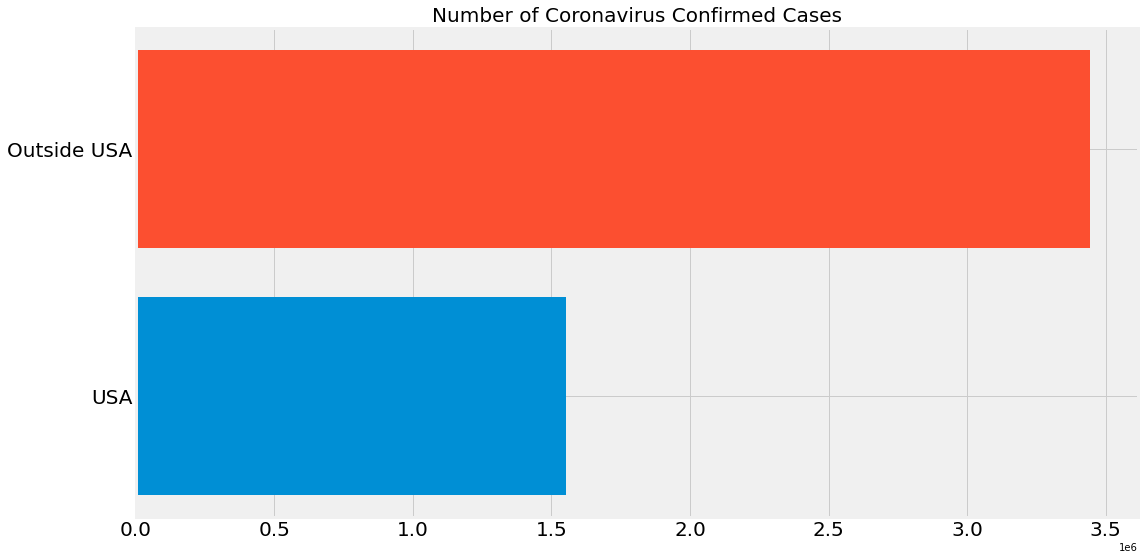

In [ ]:
USA_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_USA_confirmed = np.sum(country_confirmed_cases) - USA_confirmed
plt.figure(figsize=(16, 9))
plt.barh('USA', USA_confirmed)
plt.barh('Outside USA', outside_USA_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
print('Outside USA {} cases:'.format(outside_USA_confirmed))
print('USA: {} cases'.format(USA_confirmed))
print('Total: {} cases'.format(USA_confirmed+outside_USA_confirmed))

Outside USA 3444619 cases:
USA: 1551853 cases
Total: 4996472 cases


In [ ]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [ ]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

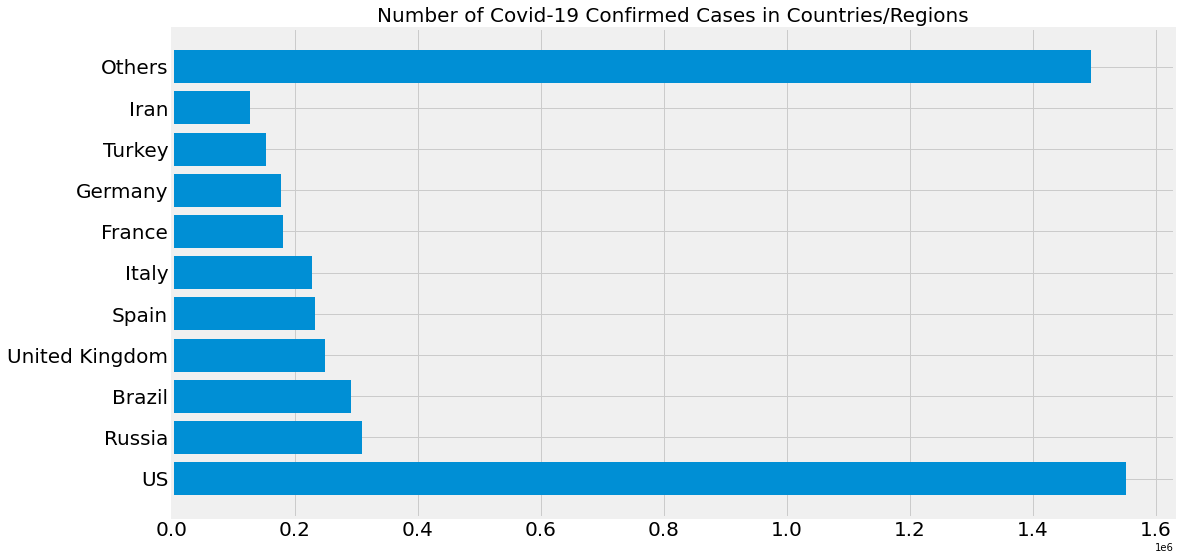

In [ ]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries/Regions')

In [ ]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

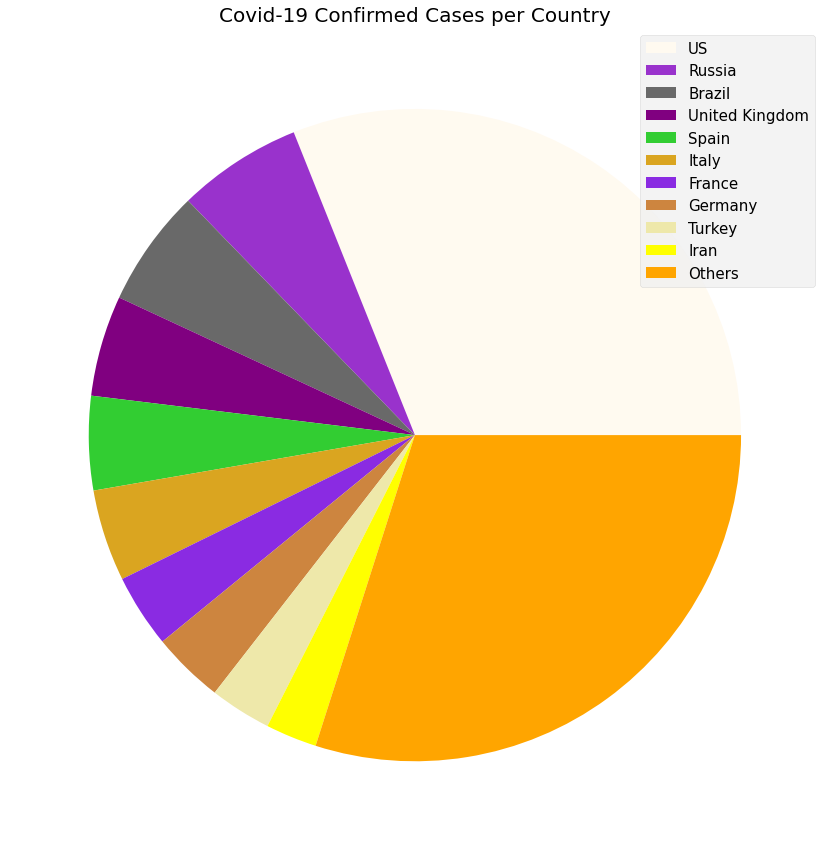

In [ ]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [ ]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the others category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

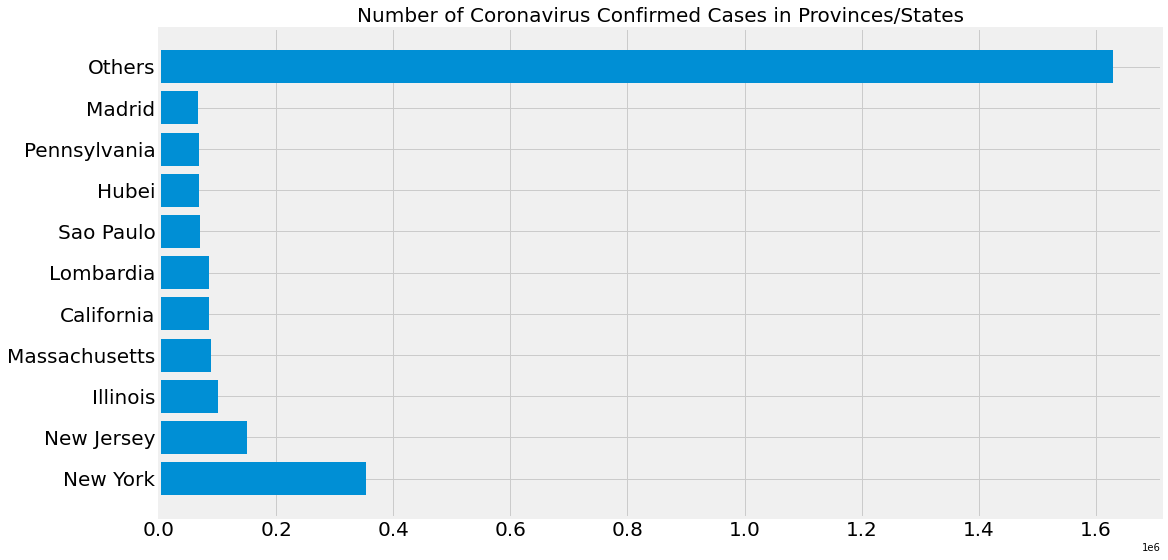

In [ ]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Number of Coronavirus Confirmed Cases in Provinces/States')

In [ ]:
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

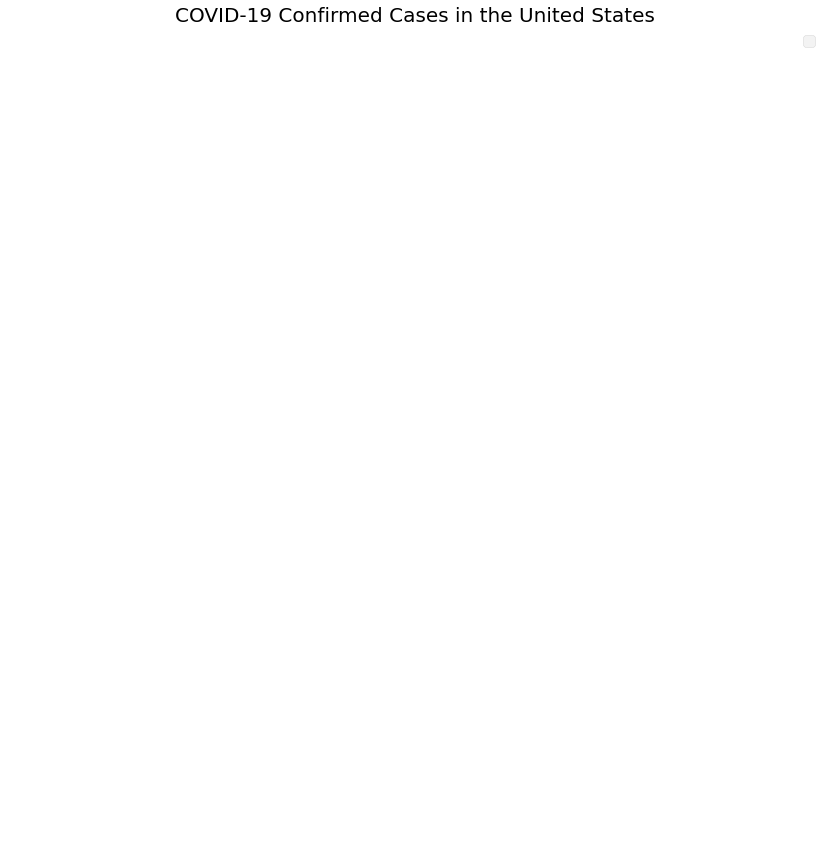

In [ ]:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in the United States')

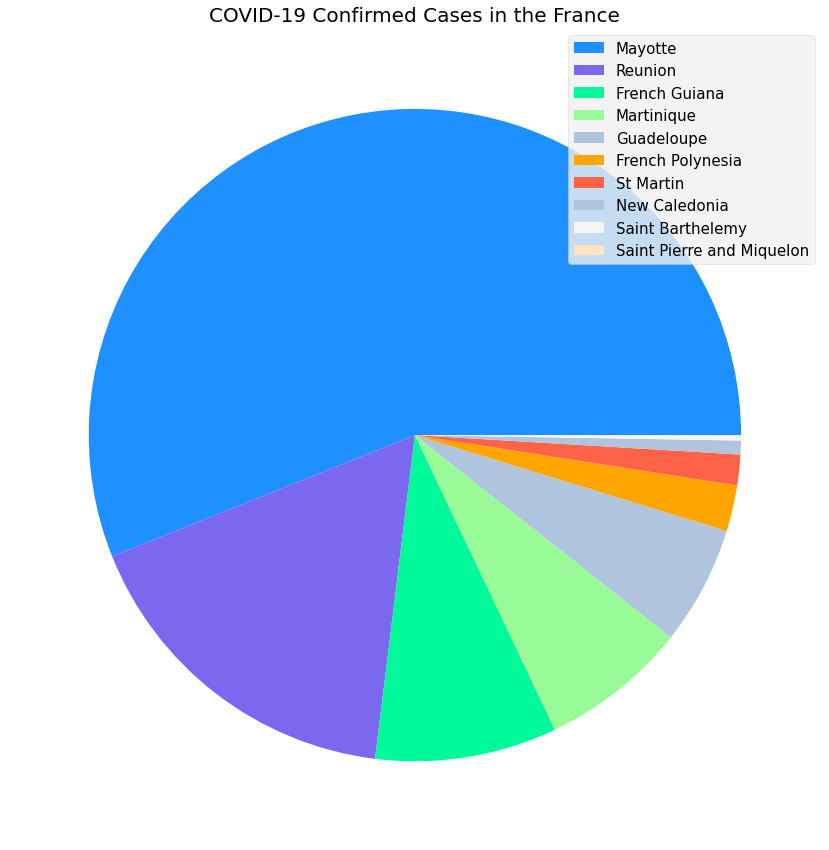

In [ ]:
plot_pie_country_with_regions('France', 'COVID-19 Confirmed Cases in the France')

In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [ ]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [ ]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False) 

In [ ]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [ ]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 1682236.975974442
MSE: 3914993921078.1143


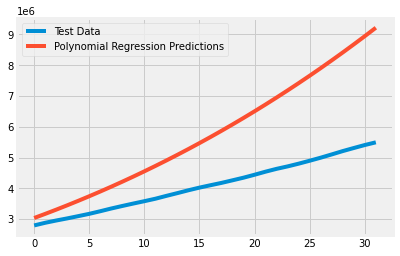

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [ ]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 3650902.560118972
MSE: 18958490596110.492


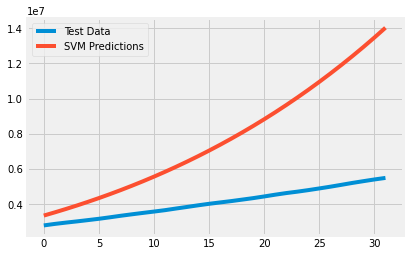

In [ ]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

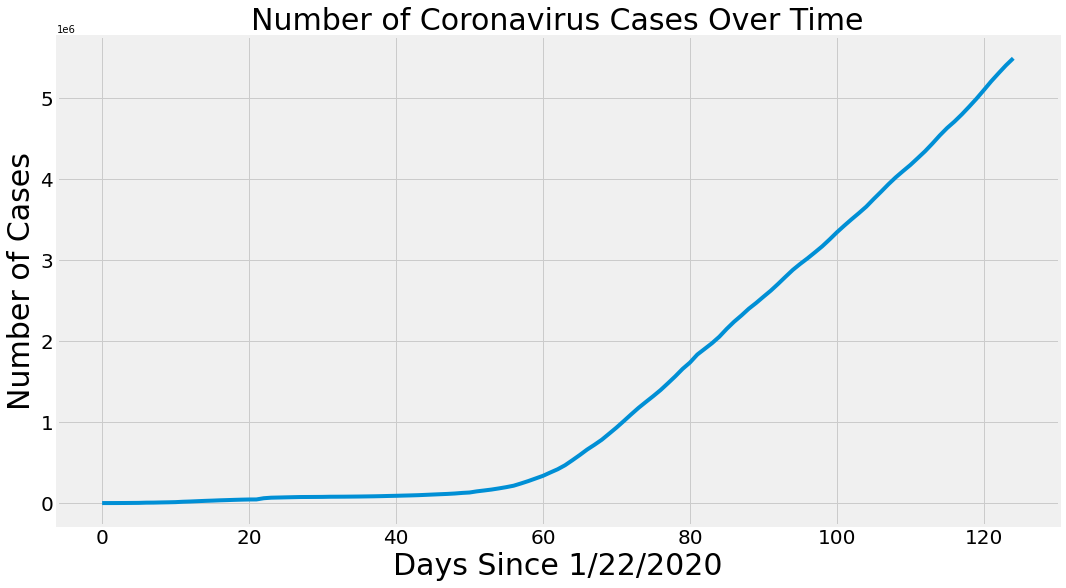

In [ ]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

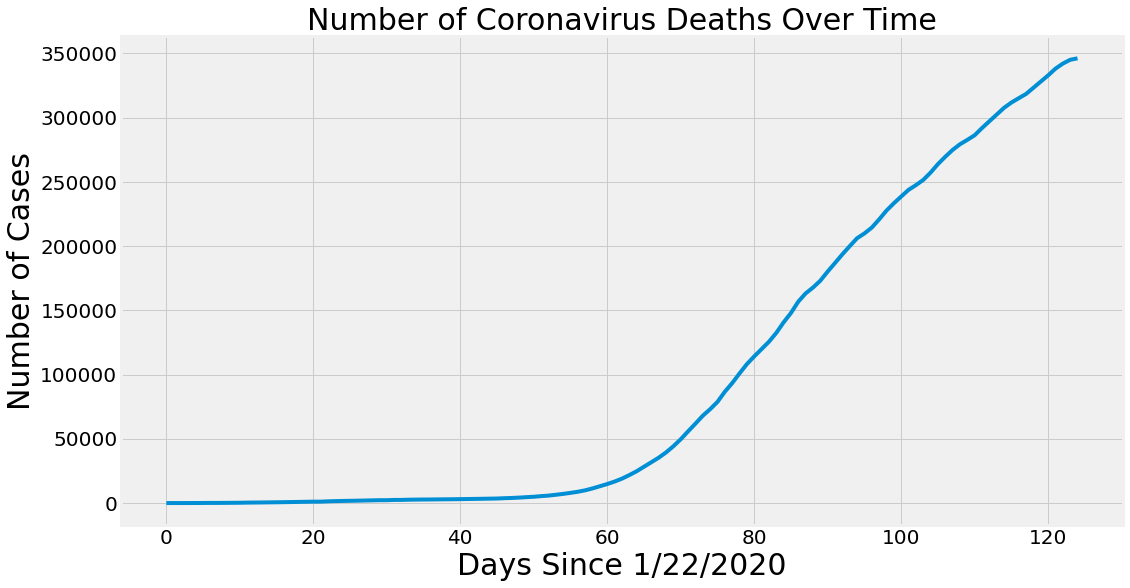

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

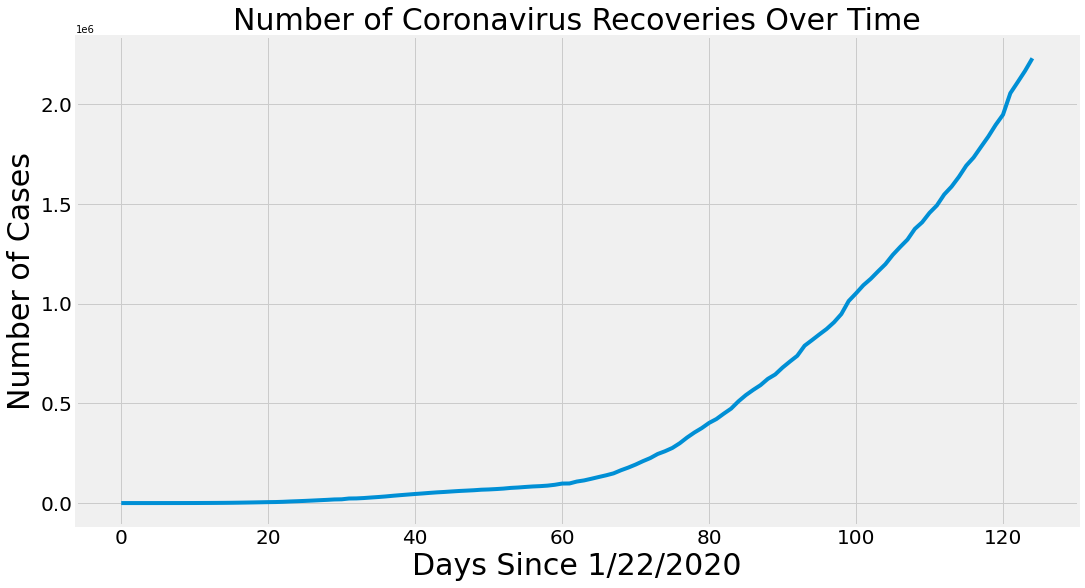

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

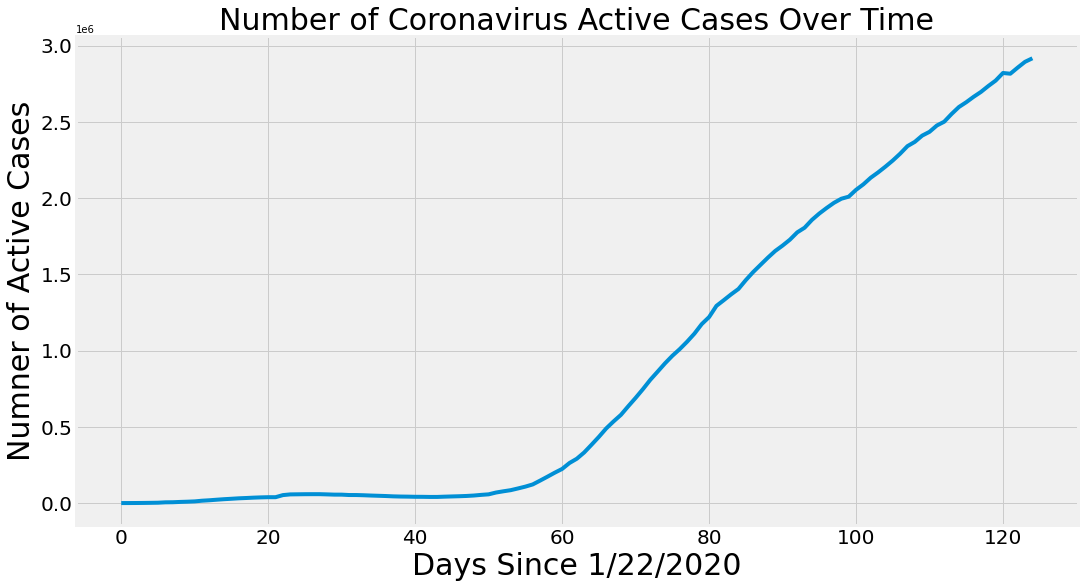

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Numner of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

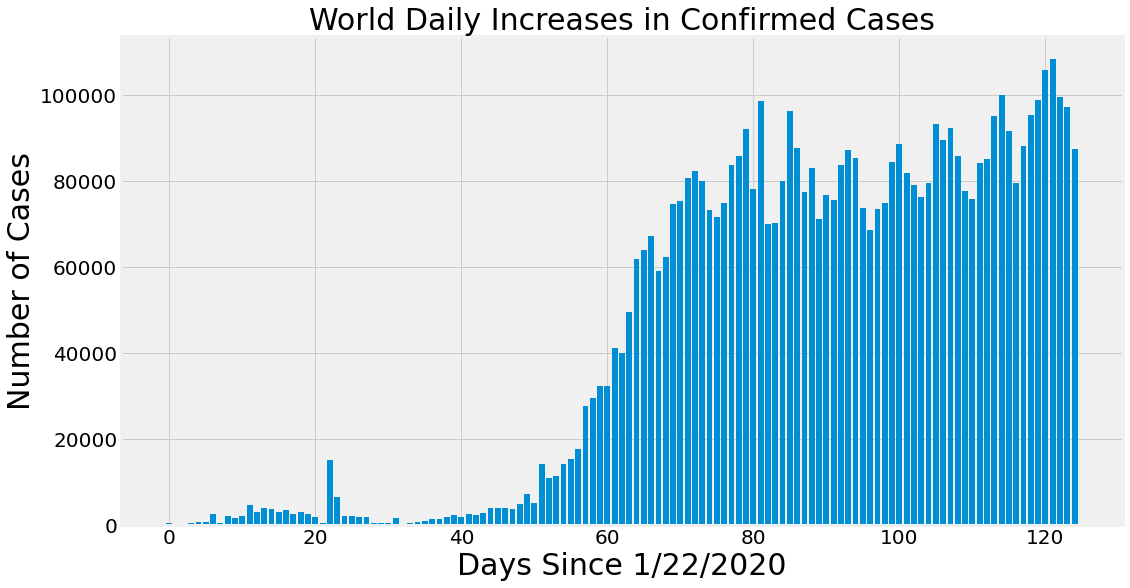

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

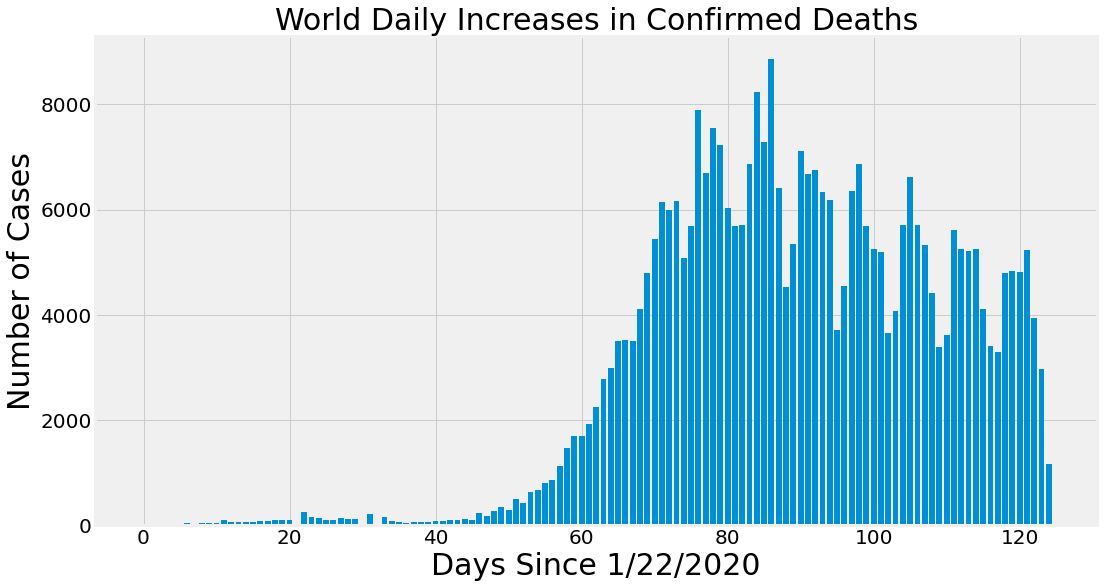

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

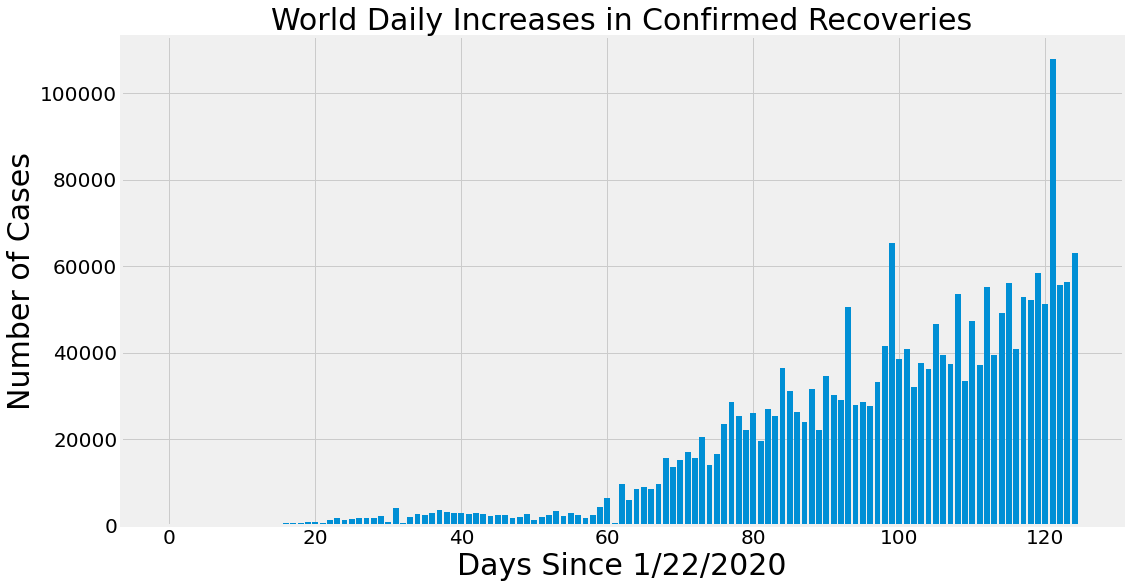

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

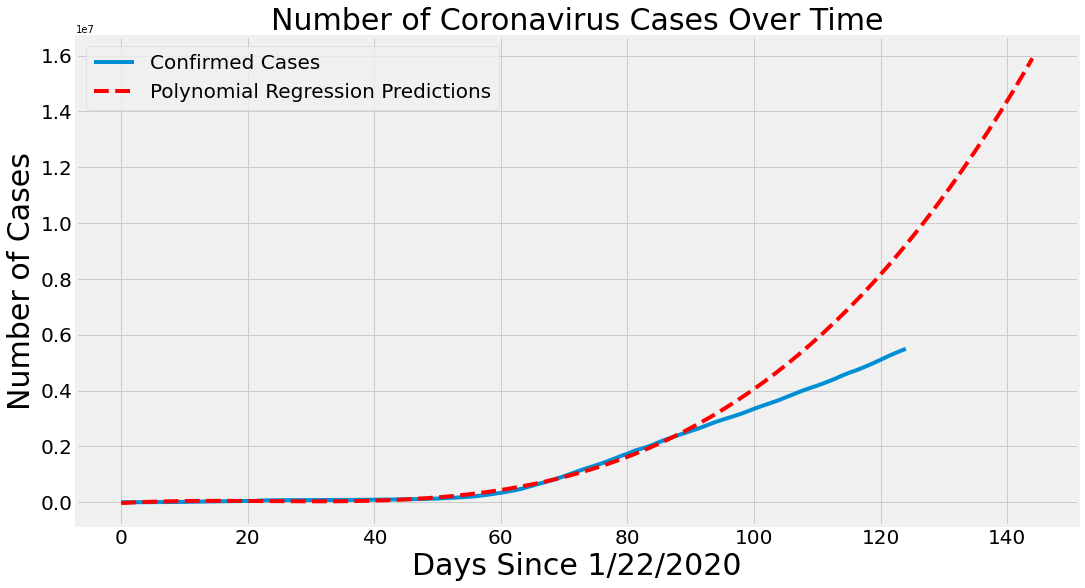

In [ ]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

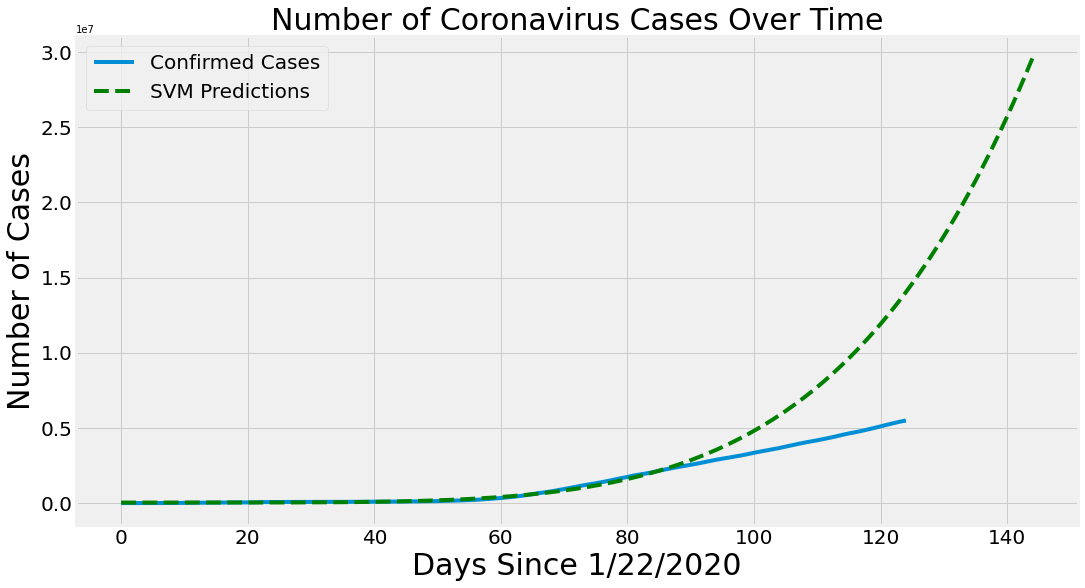

In [ ]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'green')

In [ ]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-20:])})
poly_df

Date  Predicted number of Confirmed Cases Worldwide
0   05/26/2020                                      9496427.0
1   05/27/2020                                      9780532.0
2   05/28/2020                                     10070237.0
3   05/29/2020                                     10365596.0
4   05/30/2020                                     10666664.0
5   05/31/2020                                     10973496.0
6   06/01/2020                                     11286146.0
7   06/02/2020                                     11604667.0
8   06/03/2020                                     11929115.0
9   06/04/2020                                     12259543.0
10  06/05/2020                                     12596007.0
11  06/06/2020                                     12938560.0
12  06/07/2020                                     13287256.0
13  06/08/2020                                     13642151.0
14  06/09/2020                                     14003298.0
15  06/10/2020                                     14370752.0
16  06/11/2020                                     14744567.0
17  06/12/2020                                     15124797.0
18  06/13/2020                                     15511498.0
19  06/14/2020                                     15904722.0

In [ ]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-20:])})
svm_df

Date  SVM Predicted # of Confirmed Cases Worldwide
0   05/26/2020                                    14603257.0
1   05/27/2020                                    15195431.0
2   05/28/2020                                    15806705.0
3   05/29/2020                                    16437539.0
4   05/30/2020                                    17088397.0
5   05/31/2020                                    17759752.0
6   06/01/2020                                    18452086.0
7   06/02/2020                                    19165885.0
8   06/03/2020                                    19901646.0
9   06/04/2020                                    20659871.0
10  06/05/2020                                    21441070.0
11  06/06/2020                                    22245762.0
12  06/07/2020                                    23074472.0
13  06/08/2020                                    23927735.0
14  06/09/2020                                    24806092.0
15  06/10/2020                                    25710093.0
16  06/11/2020                                    26640294.0
17  06/12/2020                                    27597261.0
18  06/13/2020                                    28581569.0
19  06/14/2020                                    29593798.0

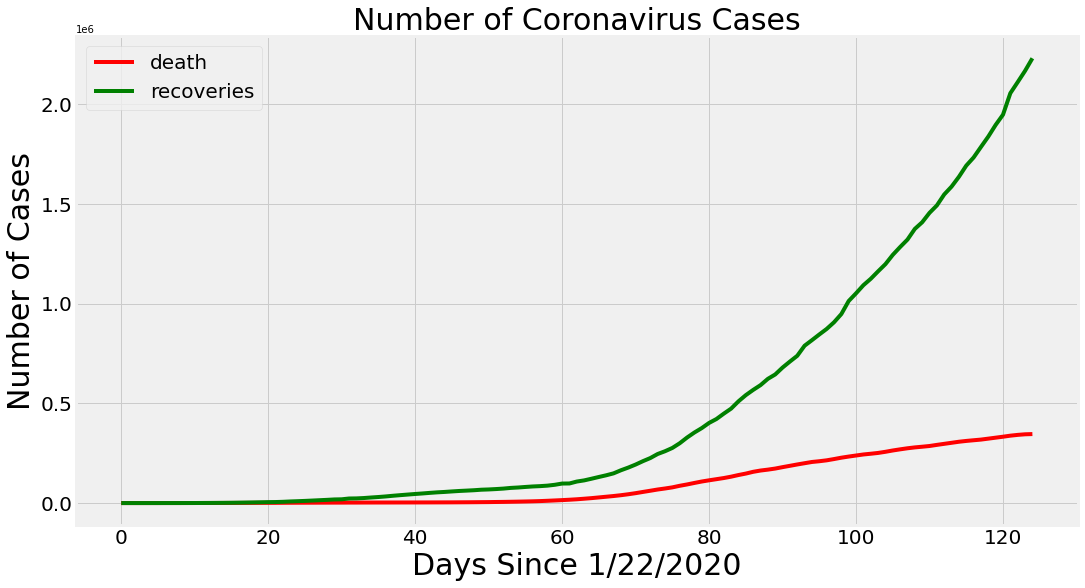

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

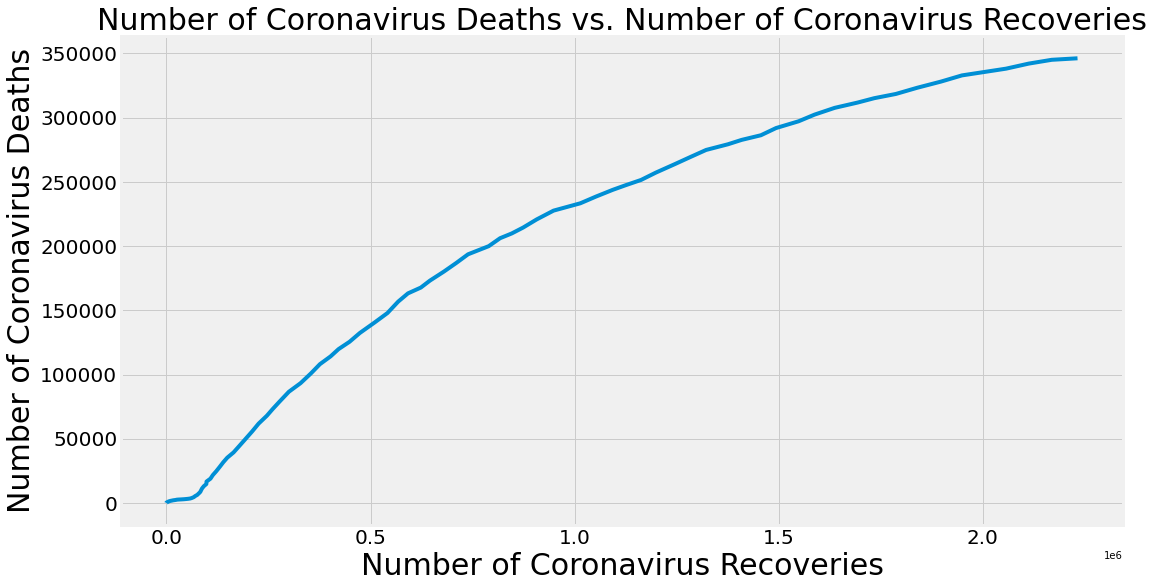

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

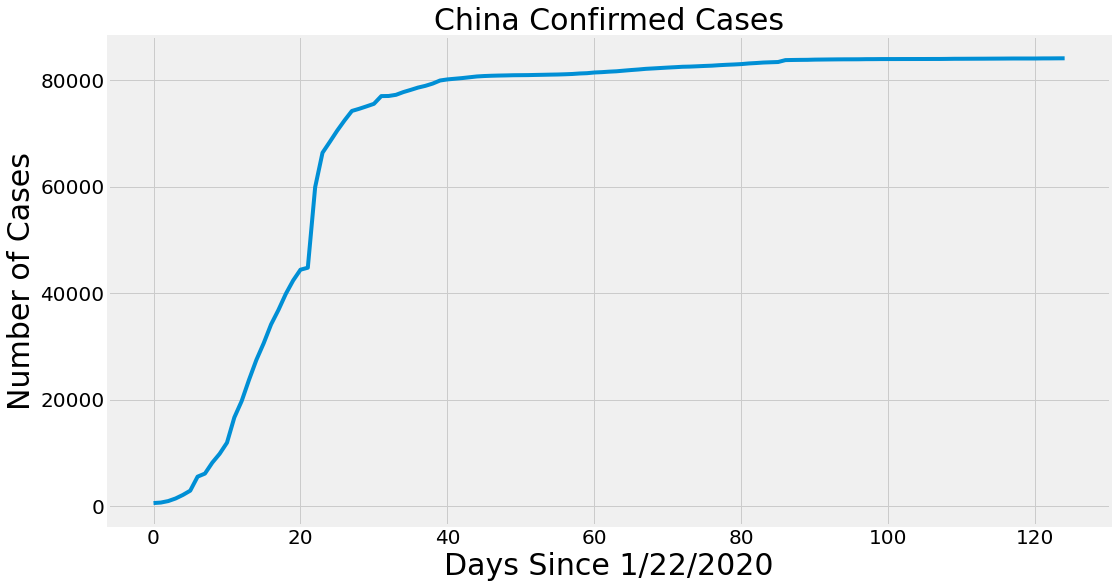

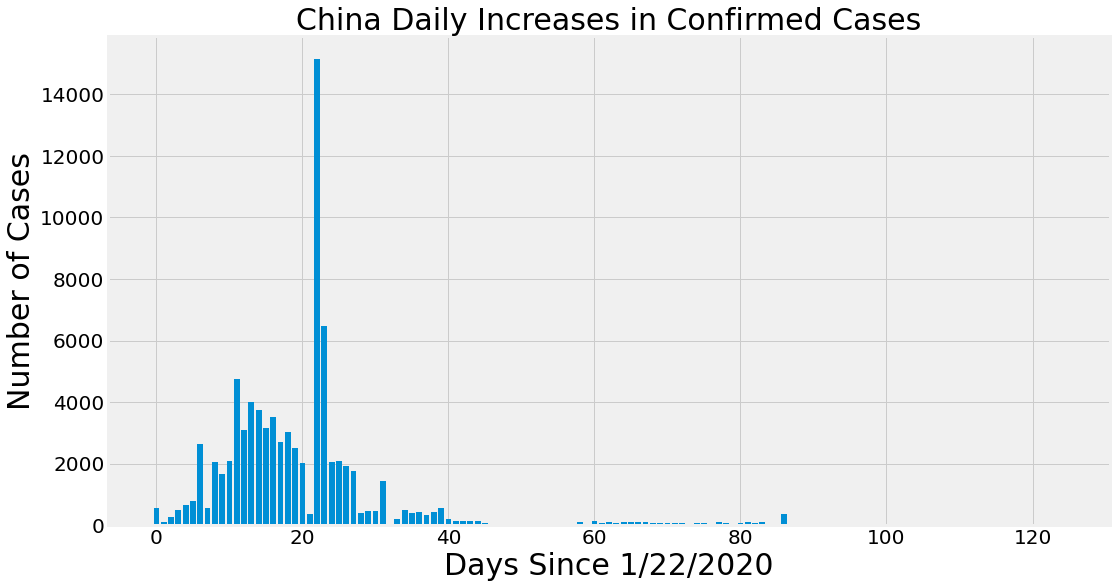

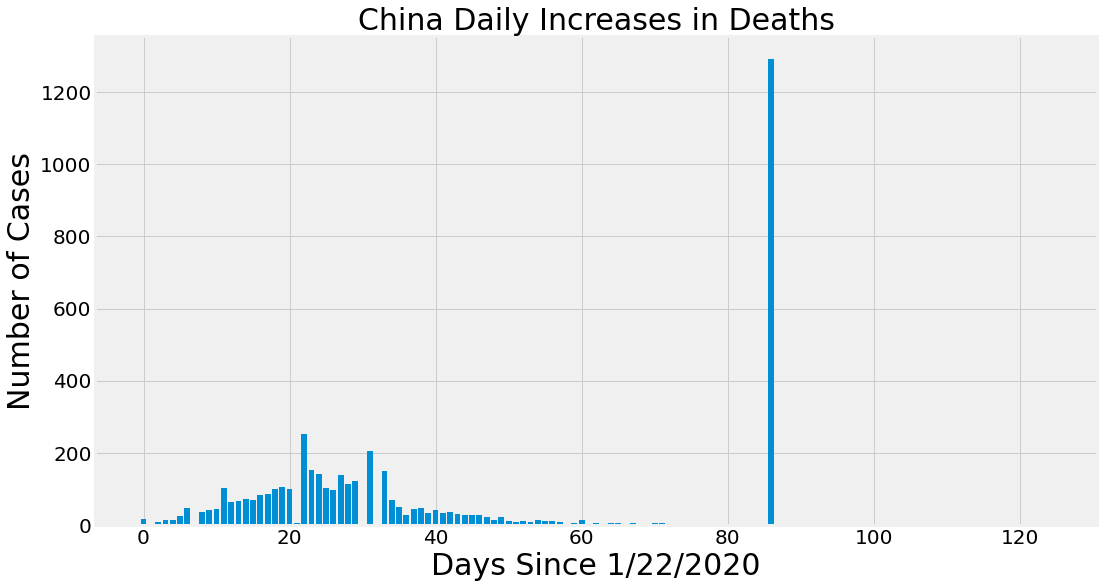

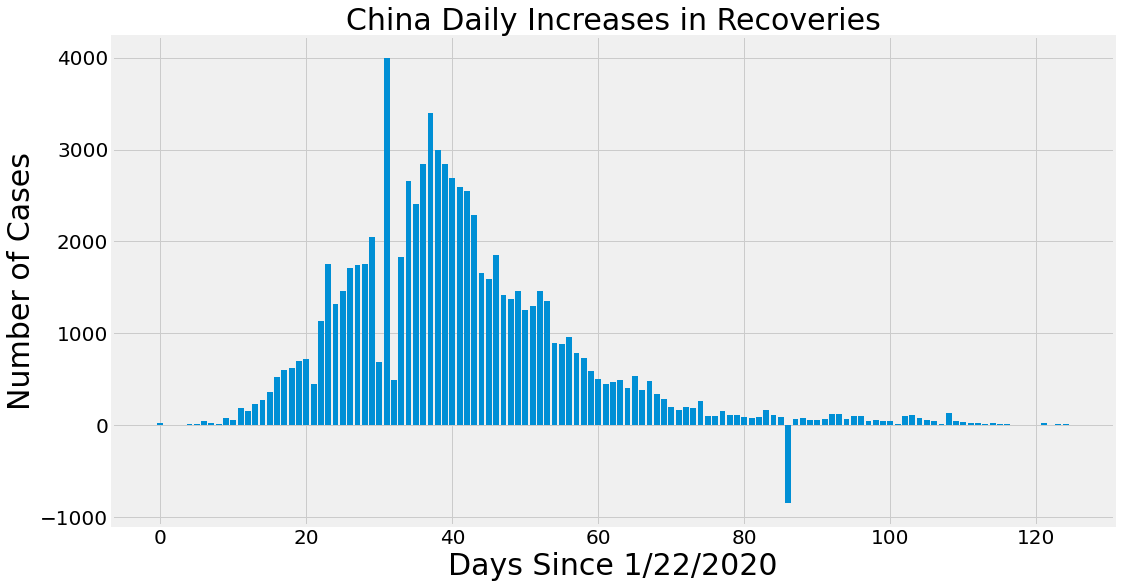

In [ ]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

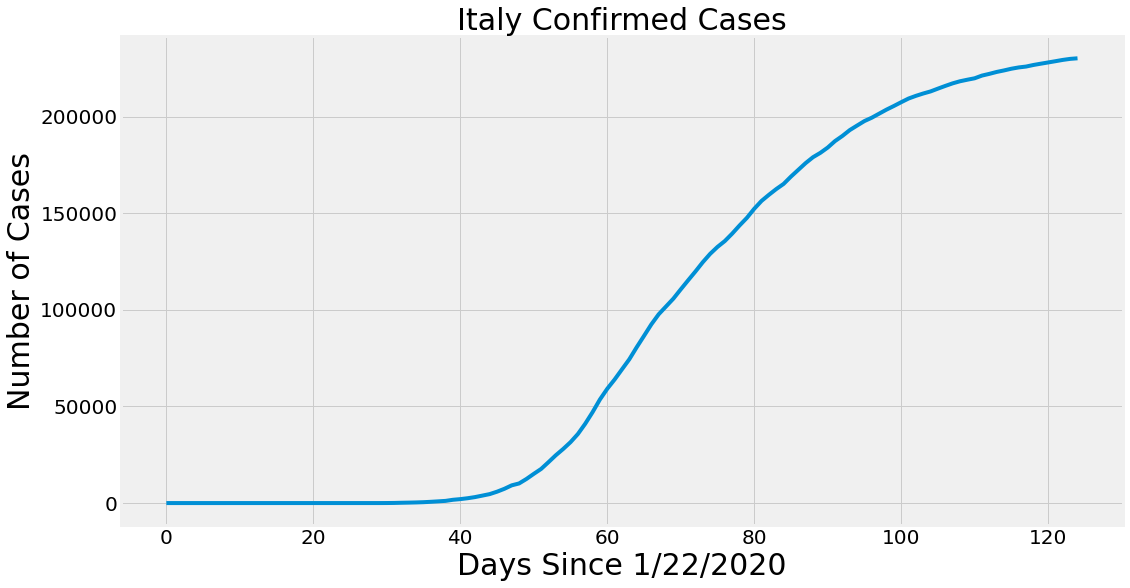

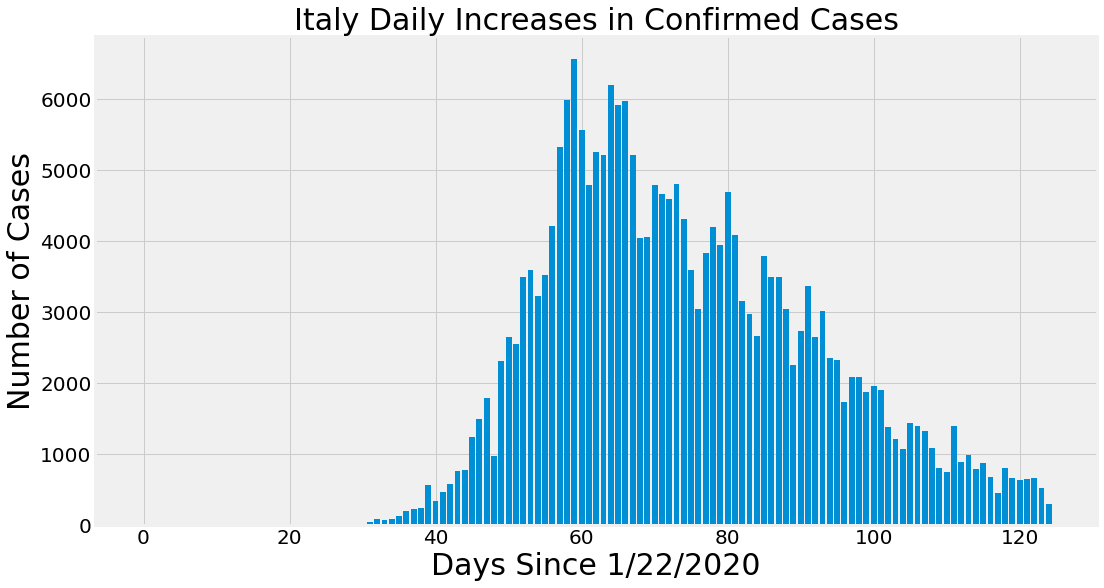

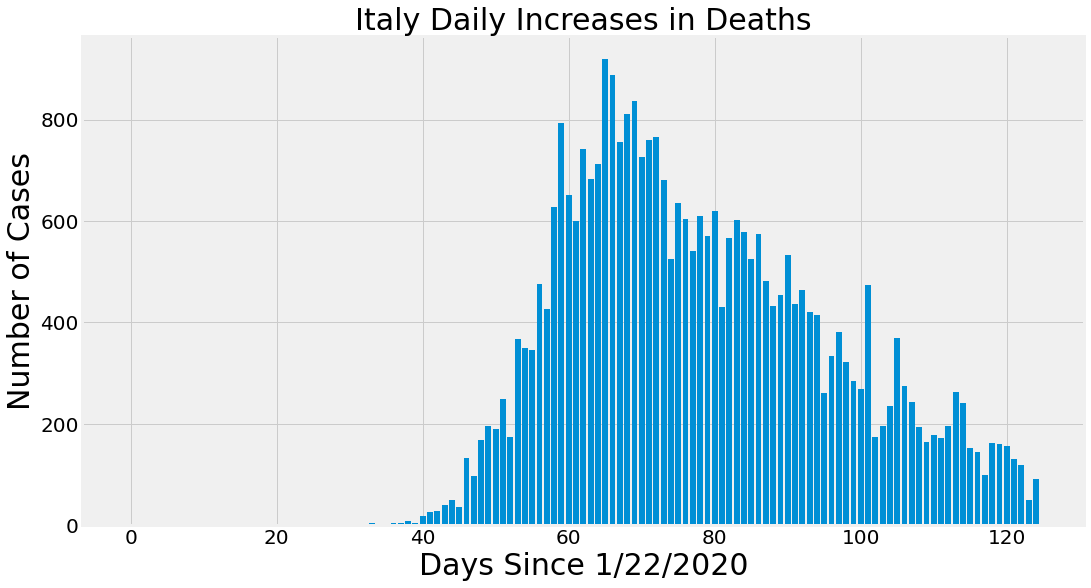

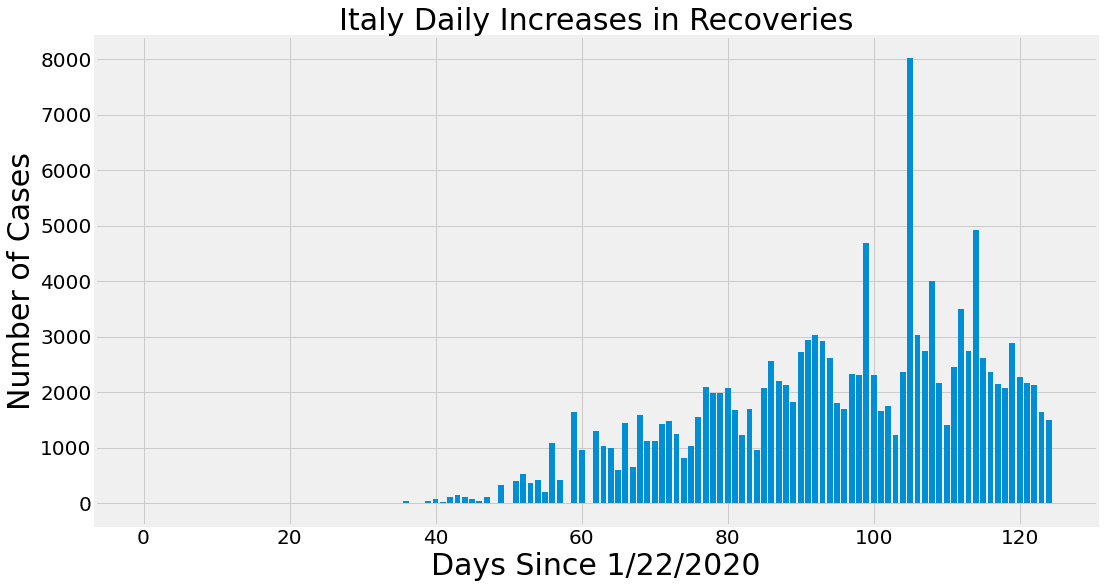

In [ ]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

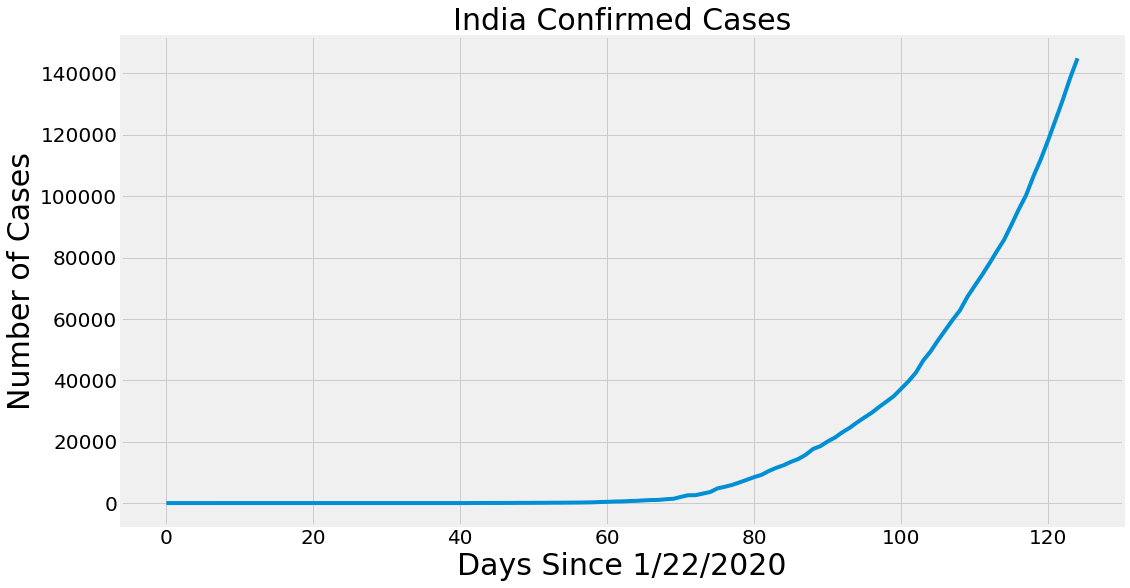

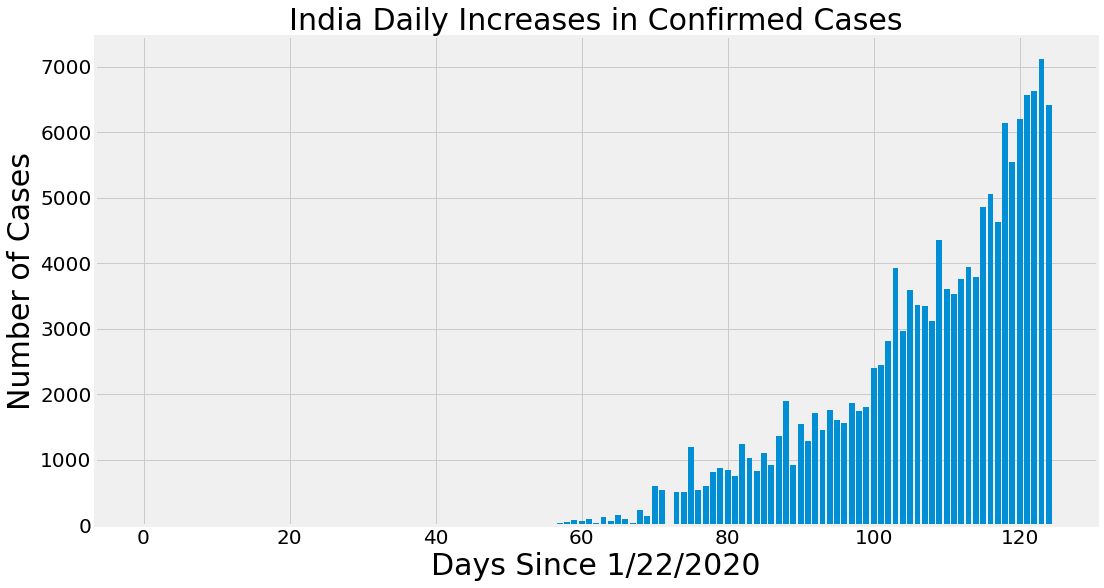

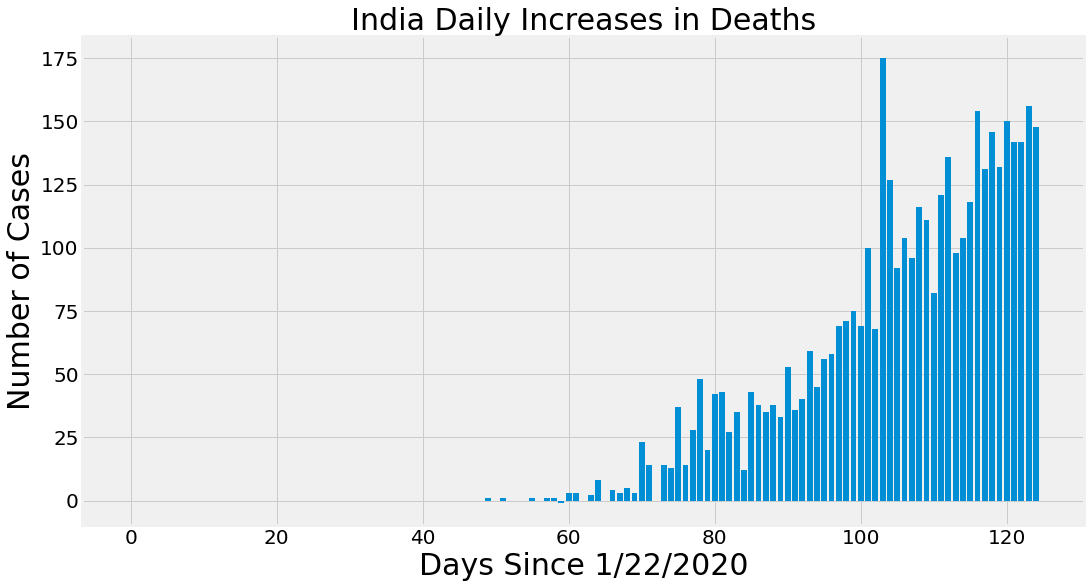

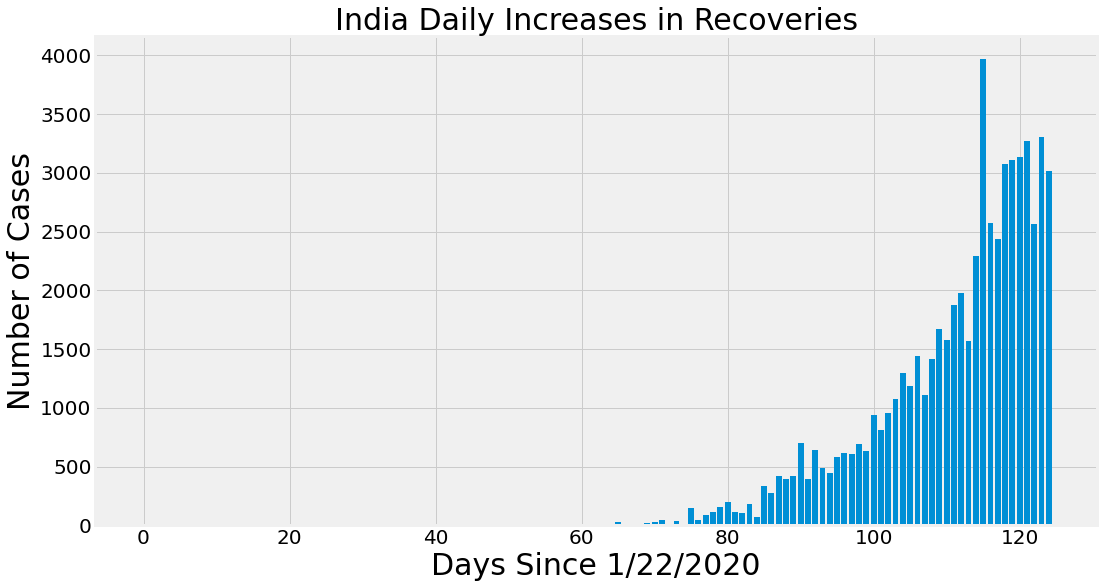

In [ ]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

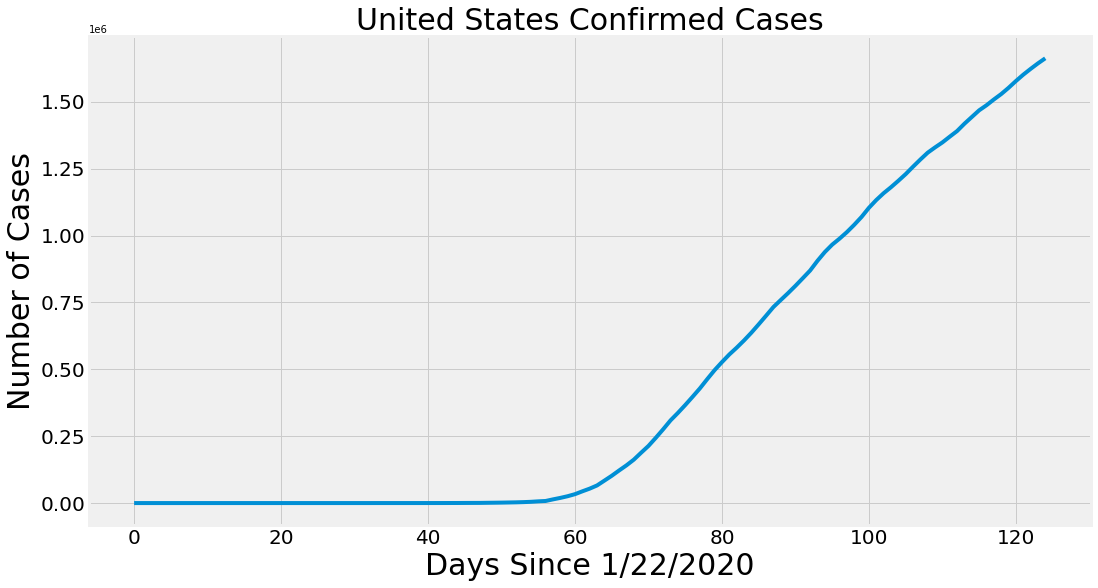

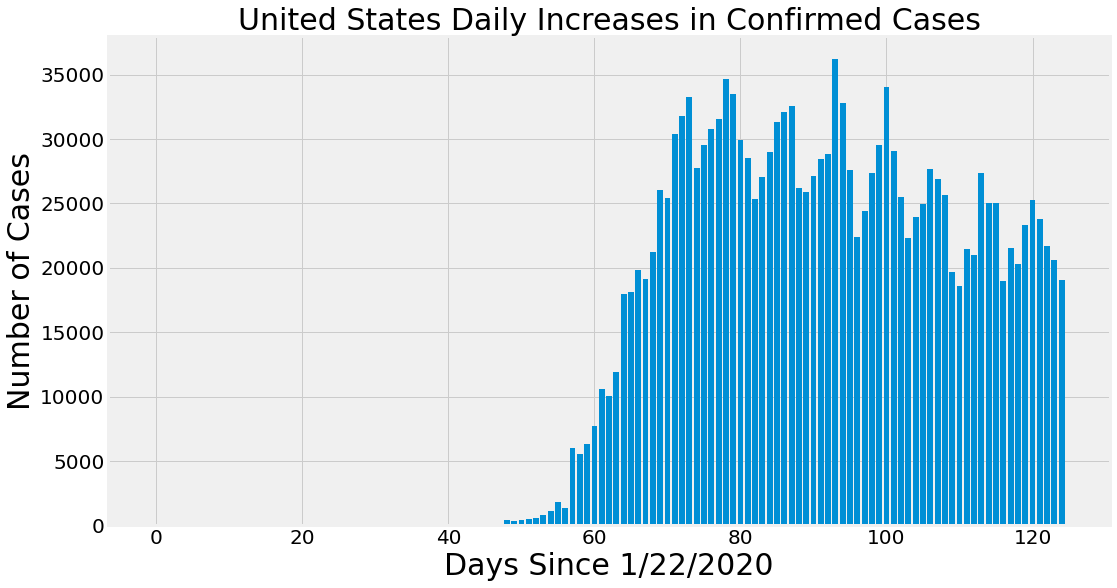

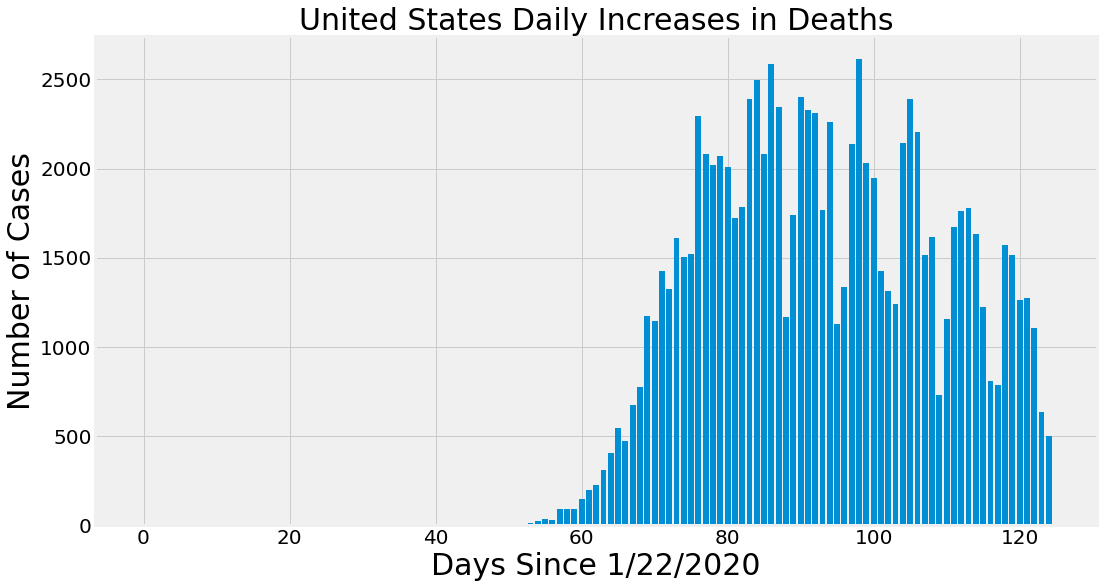

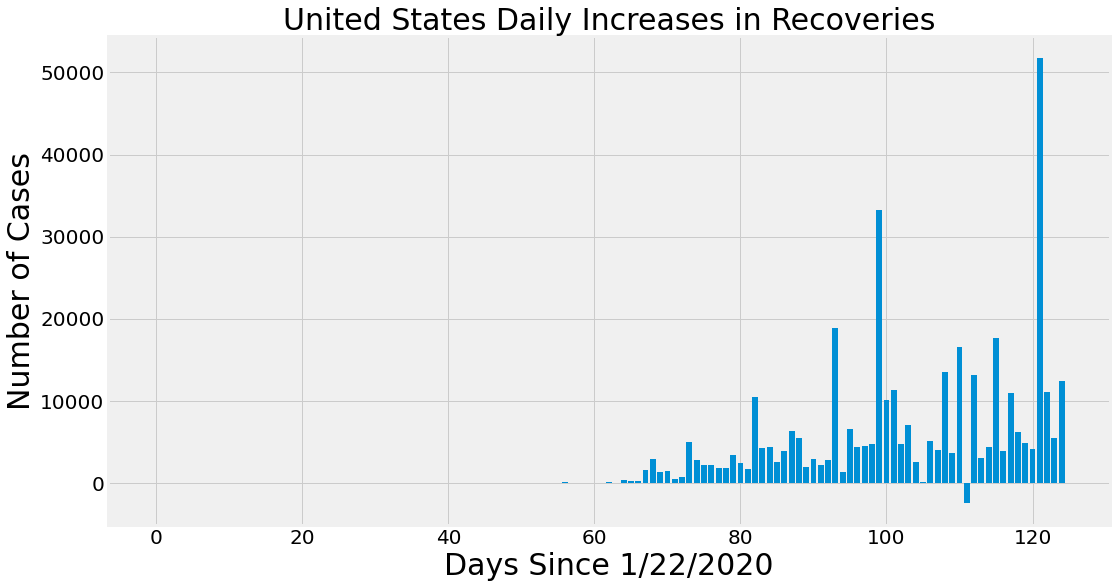

In [ ]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

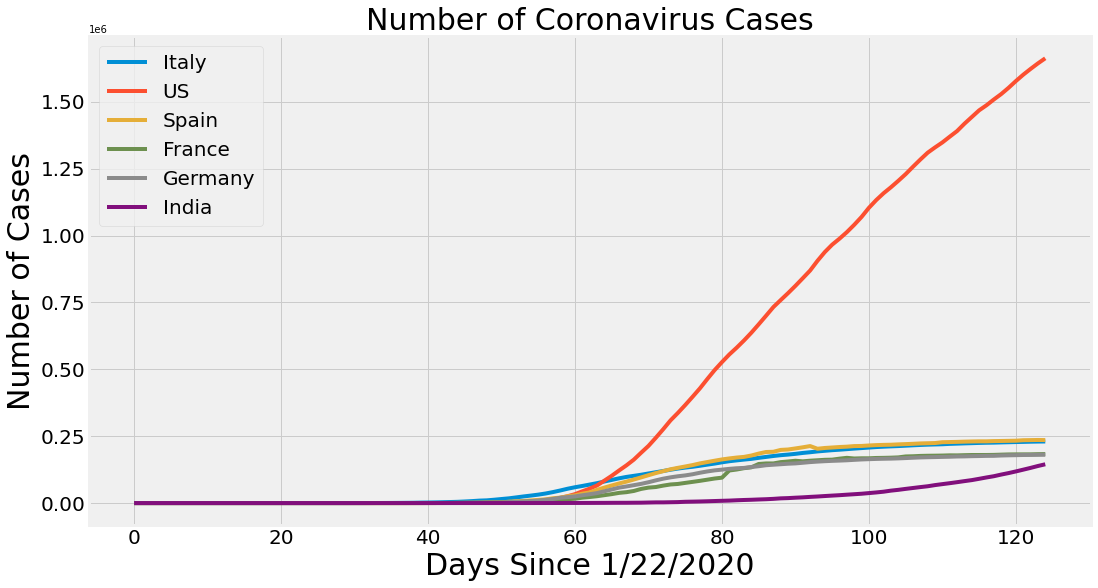

In [ ]:
plt.figure(figsize=(16, 9))
#plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend([ 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

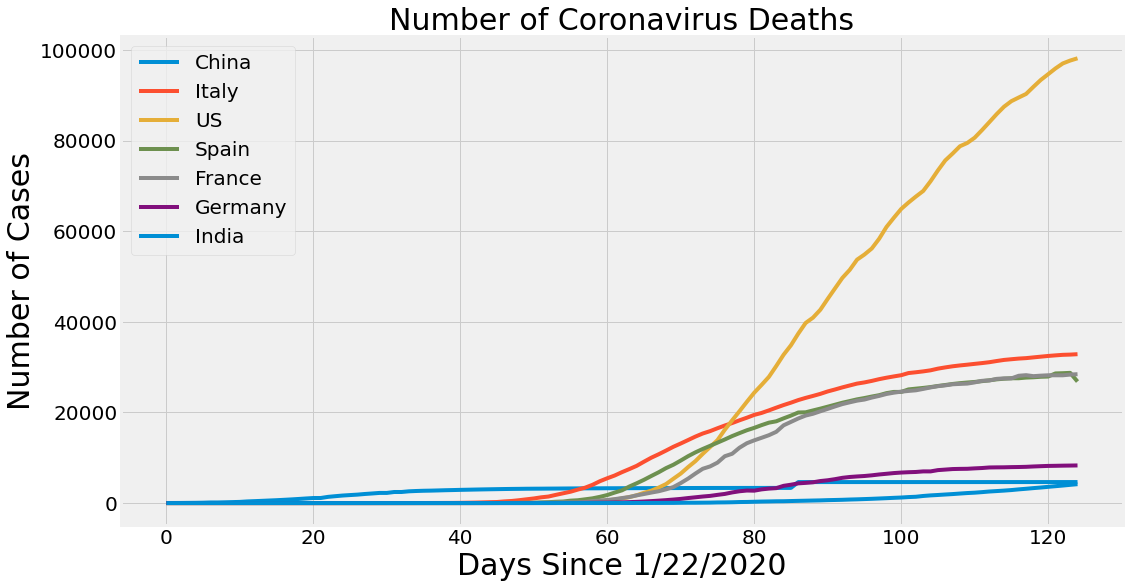

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.title('Number of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

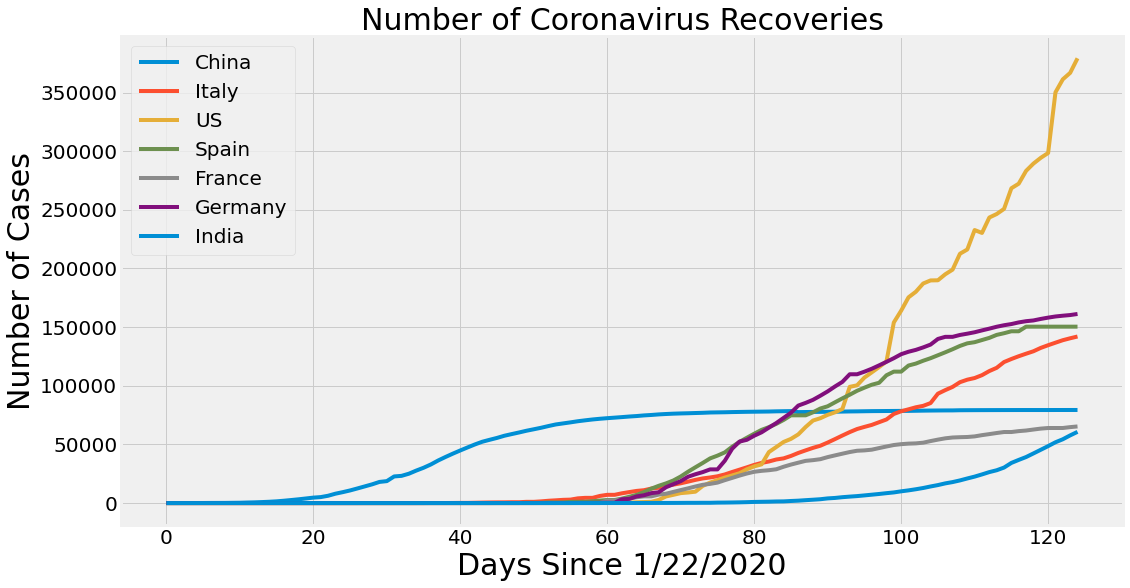

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.title('Number of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()